In [196]:
import sqlite3
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt     
sns.set_theme(color_codes=True)

### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [197]:
fsq_df = pd.read_csv("../data/fsq_for_EDA.csv")
# print(fsq.head(1))
# fsq = fsq[['name', 'distance', 'rating', 'price']]
# print(fsq.head(1))
fsq_df.head()

,name,price,rating,distance,latitude,longitude
0,Coffee & Whisky House,3.0,8.8,657,53.011939,18.611414
1,Coffee & Whisky House,3.0,8.8,603,53.012029,18.596202
2,Coffee & Whisky House,3.0,8.8,229,53.009622,18.600228
3,Coffee & Whisky House,3.0,8.8,211,53.007485,18.600735
4,Coffee & Whisky House,3.0,8.8,832,53.015745,18.607203


In [198]:
yelp_df = pd.read_csv("../data/yelp_for_EDA.csv")
# print(yelp.head(1))
# yelp = yelp[['name', 'distance', 'rating', 'price']]
print(yelp_df.head(1))
yelp_df['price'].unique()
yelp_df['price'] = yelp_df['price'].apply(lambda x: float(len(x)) if isinstance(x, str) else x)
yelp_df['distance'] = yelp_df['distance'].apply(lambda x: int(x))
yelp_df.head()

            name price  rating    distance   latitude  longitude
0  Budzik Coffee   NaN     5.0  370.246355  53.020554  18.570606


,name,price,rating,distance,latitude,longitude
0,Budzik Coffee,NaN,5.0,370,53.020554,18.570606
1,Sklep Bar na Rozdrożu Pudełek Brygida,NaN,5.0,347,53.010124,18.584802
2,Gepetto,NaN,5.0,714,53.020554,18.570606
3,Mr. Capone,NaN,5.0,373,53.020554,18.570606
4,Mr. Capone,NaN,5.0,683,53.014522,18.561600


In [199]:
# Merge 2 DataFrames 
fsq_yelp_df = pd.concat([fsq_df, yelp_df], ignore_index=True)
fsq_yelp_df.shape

(731, 6)

In [200]:
# Get all networks from CSV file
city_bikes_df = pd.read_csv('../data/city_bikes.csv')

In [201]:
# Join CityBikes ON FSQ-Yelp
eda_df = fsq_yelp_df.merge(city_bikes_df, how='left', on=['latitude', 'longitude'])
eda_df.head()

,name,price,rating,distance,latitude,longitude,bikes_available
0,Coffee & Whisky House,3.0,8.8,657,53.011939,18.611414,5
1,Coffee & Whisky House,3.0,8.8,603,53.012029,18.596202,6
2,Coffee & Whisky House,3.0,8.8,229,53.009622,18.600228,4
3,Coffee & Whisky House,3.0,8.8,211,53.007485,18.600735,6
4,Coffee & Whisky House,3.0,8.8,832,53.015745,18.607203,9


In [202]:
# Save DataFrame to CSV file
eda_df.to_csv("../data/data_for_EDA.csv")
eda_df.shape

(731, 7)

### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

Duplicate columns: []
Duplicate index: []


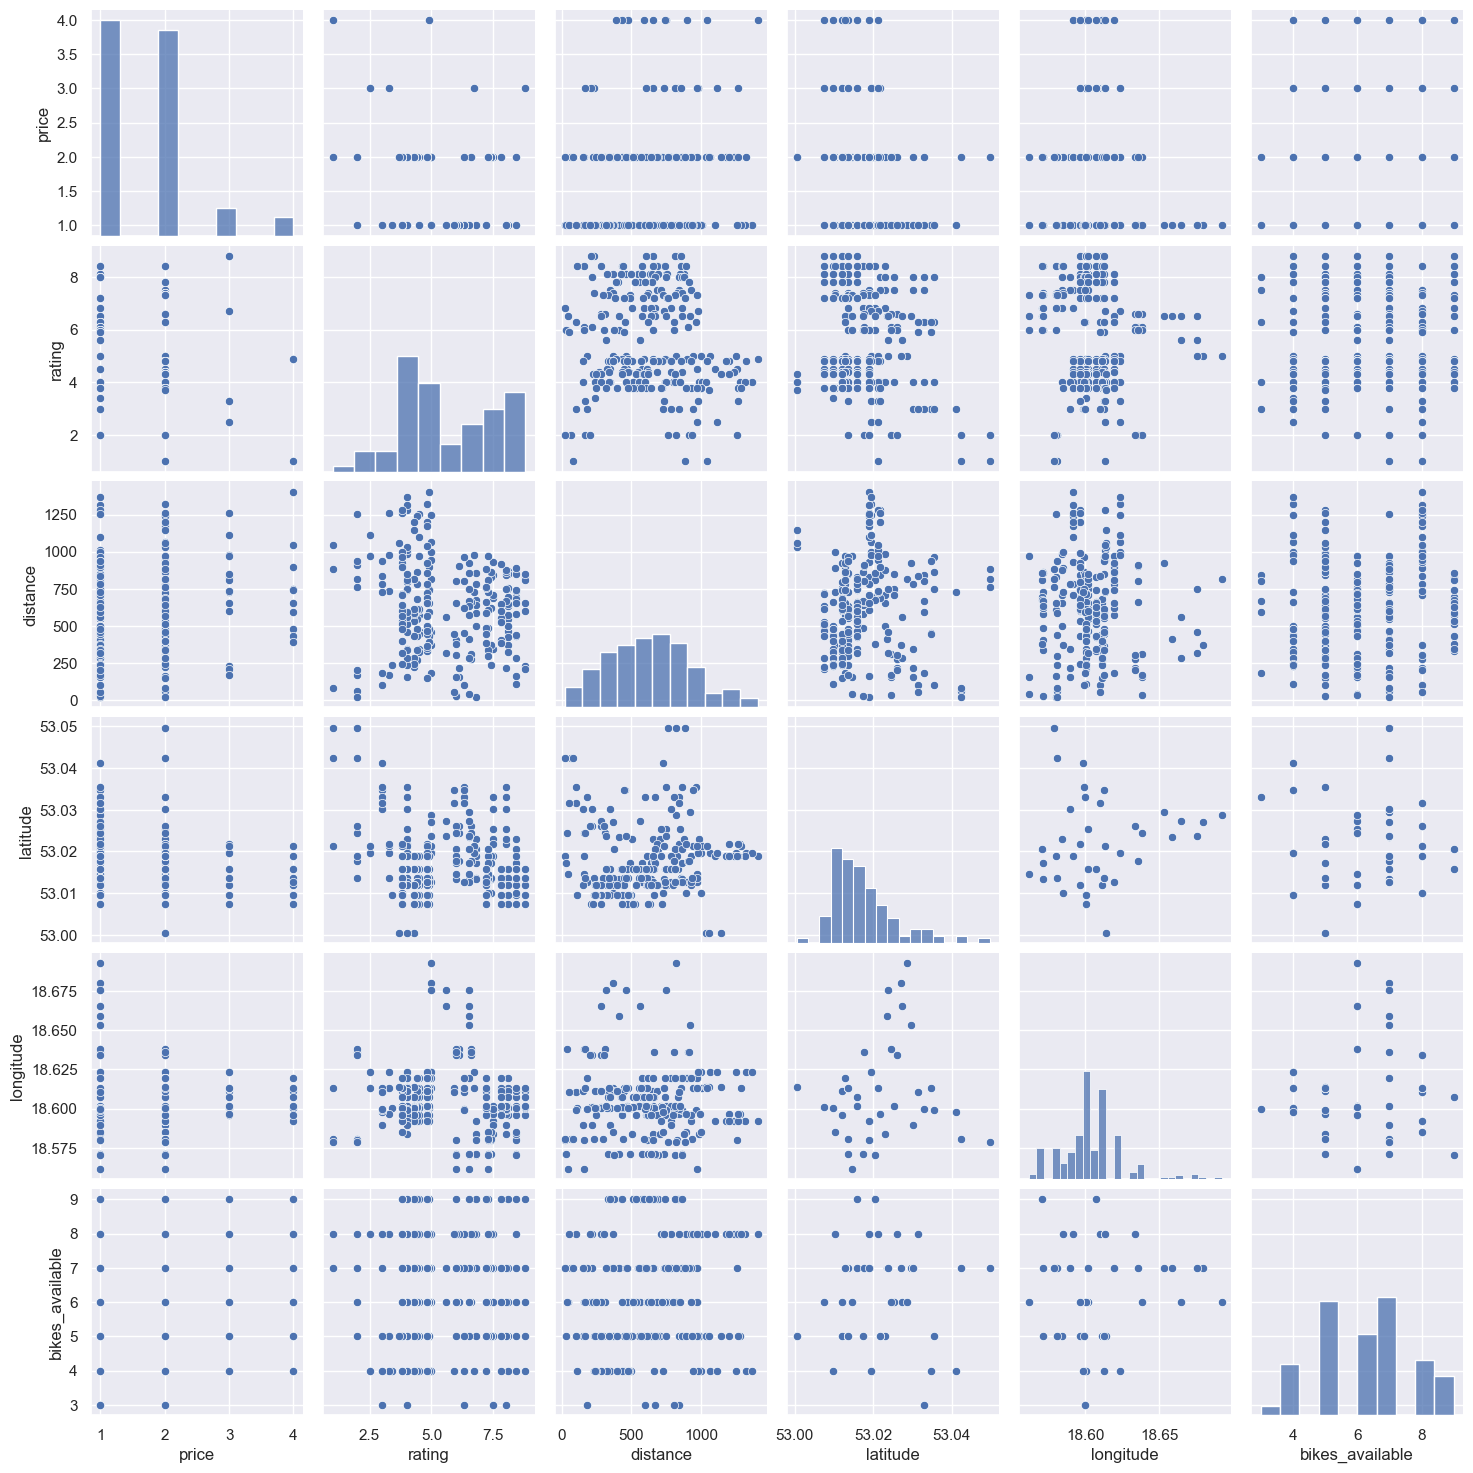

In [203]:
# Identify duplicate column labels
duplicates = eda_df.columns[eda_df.columns.duplicated()]
print(f"Duplicate columns: {duplicates.tolist()}")
# Identify duplicate index labels
duplicates = eda_df.index[eda_df.index.duplicated()]
print(f"Duplicate index: {duplicates.tolist()}")
tmp = eda_df.drop_duplicates(inplace=False)
tmp = tmp.dropna(inplace=False)
sns.pairplot(data=tmp)
plt.show()

# Database

### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [204]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('../data/api.db')

# Save DataFrames to SQLite table
city_bikes_df.to_sql('city_bikes', conn, if_exists='replace', index=False)
fsq_yelp_df.to_sql('fsq_yelp', conn, if_exists='replace', index=False)
eda_df.to_sql('eda', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print('Data saved to SQLite database!')

Data saved to SQLite database!


### Look at the data before and after the join to validate your data.

In [205]:
print(f'CityBikes DataFrame shape {city_bikes_df.shape}')
print(f'FourSquare DataFrame shape {fsq_df.shape}')
print(f'Yelp DataFrame shape {yelp_df.shape}')
print(f'EDA DataFrame after joining city_bikes, fsq, and yelp {eda_df.shape}')

CityBikes DataFrame shape (51, 3)
FourSquare DataFrame shape (483, 6)
Yelp DataFrame shape (248, 6)
EDA DataFrame after joining city_bikes, fsq, and yelp (731, 7)
